In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import TensorBoard

from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lianxinyu/opt/anaconda3/l

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("data_perfect_final.csv", header=0)
df.shape

(14145, 57)

In [9]:
df.head()

,Unnamed: 0,id,normalized_name,funding_rounds,funding_total_usd,milestones,relationships,PopulationEstimate-2013,PopulationGrowth,private_eq,...,web,mobile,advertising,ecommerce,analytics,games_video,cleantech,other_category,age,funding_velocity
0,0,c:1,wetpaint,3.0,39750000.0,5.0,17.0,654224.0,0.071376,0.0,...,1,0,0,0,0,0,0,0,2997,13263.263263
1,11,c:10015,fitbit,5.0,68069200.0,0.0,14.0,839841.0,0.042568,0.0,...,0,0,0,0,0,0,0,1,2283,29815.681121
2,12,c:100155,mtpv,3.0,10125293.0,1.0,6.0,875463.0,0.085613,0.0,...,0,0,0,0,0,0,1,0,4017,2520.610655
3,15,c:10018,demandbase,3.0,33000000.0,3.0,19.0,839841.0,0.042568,0.0,...,0,0,0,0,1,0,0,0,2921,11297.500856
4,17,c:100189,locatrix communications,1.0,250000.0,1.0,2.0,4455.0,0.038462,0.0,...,0,1,0,0,0,0,0,0,3713,67.330999


In [10]:
df=df.drop(['Unnamed: 0','id','normalized_name'],axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('success',axis=1), 
                                                    df['success'], test_size=0.30, 
                                                    random_state=50)

In [15]:
model = Sequential()
model.add(Dense(64,input_dim=53,activation='relu'))
# 
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=20,batch_size=128)


Epoch 1/20
9901/9901 [==============================] - 2s 181us/step - loss: 0.5252 - accuracy: 0.7722
Epoch 2/20
9901/9901 [==============================] - 1s 57us/step - loss: 0.5089 - accuracy: 0.7773
Epoch 3/20
9901/9901 [==============================] - 1s 58us/step - loss: 0.5028 - accuracy: 0.7779
Epoch 4/20
9901/9901 [==============================] - 1s 59us/step - loss: 0.5018 - accuracy: 0.7778
Epoch 5/20
9901/9901 [==============================] - 1s 64us/step - loss: 0.4980 - accuracy: 0.7781
Epoch 6/20
9901/9901 [==============================] - 1s 72us/step - loss: 0.5006 - accuracy: 0.7780
Epoch 7/20
9901/9901 [==============================] - 1s 86us/step - loss: 0.4965 - accuracy: 0.7779
Epoch 8/20
9901/9901 [==============================] - 1s 66us/step - loss: 0.4970 - accuracy: 0.7781
Epoch 9/20
9901/9901 [==============================] - 1s 70us/step - loss: 0.4967 - accuracy: 0.7778
Epoch 10/20
9901/9901 [==============================] - 1s 71us/step -

In [18]:
#from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,average_precision_score,classification_report
#from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report

In [19]:
#confusion_matrix,classification_report
y_pred = np.where(model.predict(x_test)>0.5,1,0)
Cmatrix=confusion_matrix(y_test,y_pred)
Creport=classification_report(y_test,y_pred)
print(Creport)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3281
           1       0.00      0.00      0.00       963

    accuracy                           0.77      4244
   macro avg       0.39      0.50      0.44      4244
weighted avg       0.60      0.77      0.67      4244



/Users/lianxinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


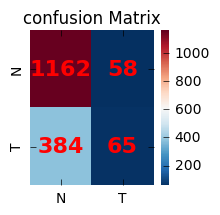

In [16]:
import seaborn as sns
f, ax= plt.subplots(figsize = (2, 2))
ax.set_title('confusion Matrix')
#sns.set_context({"figure.figsize":(2,2)})
sns.heatmap(Cmatrix,annot=True,annot_kws={'size':16,'weight':'bold', 'color':'red'},fmt='d',xticklabels=('N','T'), yticklabels=('N','T'),\
           cmap="RdBu_r",ax=ax)
plt.show()

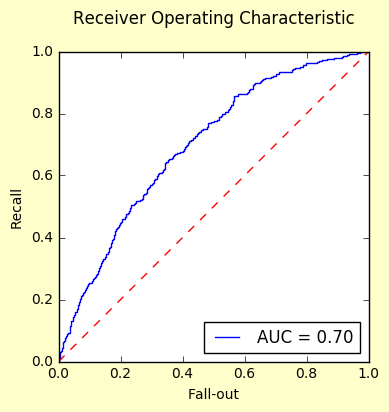

In [17]:
#  ROC 
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test), pos_label=1) 
rauc=auc(fpr, tpr) 
plt.figure(figsize=(4,4),facecolor='#ffffcc',edgecolor='#ffffcc')
plt.title('Receiver Operating Characteristic\n')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % rauc)
#plt.plot(fpr,tpr,label='AUC = %0.2f' % rauc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()